# Data Exploration of `pubs.csv`
(File obtained after cleaning with `clean_data.ipynb`)

Imports & installations (uncomment to install)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import missingno as msno
import nltk
from nltk.tag import StanfordNERTagger
import os
import itertools
import math
import spacy
from sklearn.metrics import accuracy_score
from itertools import combinations

In [2]:
# !pip install matplotlib

In [3]:
# !pip install seaborn

In [4]:
# !pip install missingno

In [ ]:
# !python -m spacy download nl_core_news_sm

In [ ]:
# !python -m spacy download en_core_web_sm

In [ ]:
# !pip install nltk

## Exploratory Data Analysis

In [10]:
df = pd.read_csv("data/cleaned/pubs.csv")
# df.head()

C:\Users\20211831\AppData\Local\Temp\ipykernel_25768\1888714913.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/cleaned/pubs.csv")


In [11]:
df.describe(include='all')

,integer_id,thesis_identifier,institution,author_name,title,year,language,contributor_1,contributor_2,contributor_3,contributor_4,contributor_5,contributor_6,contributor_7,contributor_8,contributor_9,contributor_10
count,94299.000000,94299,94299,94299,94299,94299.000000,94299,94294,60203,23700,7550,2964,1333,500,138,30,4
unique,NaN,93235,26,87897,88864,NaN,19,15717,21336,11723,4378,1908,993,418,120,28,3
top,NaN,http://hdl.handle.net/1887/58921,rug,"Wang, Y.",The volatile metabolome and microbiome in pulm...,NaN,en,"Wetenschappen/UMCG, F.M.","Wetenschappen/UMCG, F.M.","Wetenschappen/UMCG, F.M.","Stan Ackermans Instituut, C.v.T.O.","Stan Ackermans Instituut, C.v.T.O.","Stan Ackermans Instituut, C.v.T.O.","Eliel, E.","Pijl, H.","Fennell, D.","Berlin, I."
freq,NaN,2,11249,32,4,NaN,78936,1041,754,420,197,75,17,6,3,2,2
mean,68971.288455,NaN,NaN,NaN,NaN,2008.862119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,35396.642262,NaN,NaN,NaN,NaN,13.208652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,1879.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,43112.500000,NaN,NaN,NaN,NaN,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,69949.000000,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,99392.500000,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Missing values

Uncomment cells for more detailed information and graphs

In [317]:
df.isnull().sum()

integer_id               0
thesis_identifier        0
institution              0
author_name              0
title                    0
year                     0
language                 0
contributor_1            5
contributor_2        34096
contributor_3        70599
contributor_4        86749
contributor_5        91335
contributor_6        92966
contributor_7        93799
contributor_8        94161
contributor_9        94269
contributor_10       94295
dtype: int64

In [318]:
# msno.bar(df)

In [319]:
# sns.heatmap(df.isnull(), cmap='viridis')
# plt.show()

In [320]:
# missing_rows = df[df.isnull().any(axis=1)]
# print(missing_rows)

#### Institutions 

In [321]:
# grouping by institution to obtain counts
df_grouped_by_institution = df.groupby(pd.Grouper(key='institution')).size()
print(df_grouped_by_institution)

institution
amcpub             2939
buas                 40
cwi                   4
eur                6441
amsterdam_pure       39
hanzepure            55
lumc                905
naturalis             5
ou                  338
ru                    1
rug               11249
tno                  48
tud                7834
tue                9163
ul                 6169
uls                   1
um                 6349
umcu               2223
ut                 5271
uu                 4210
uvapub            10673
uvh                 149
uvt                2432
vu                 7346
vumc               2183
wur                8232
dtype: int64


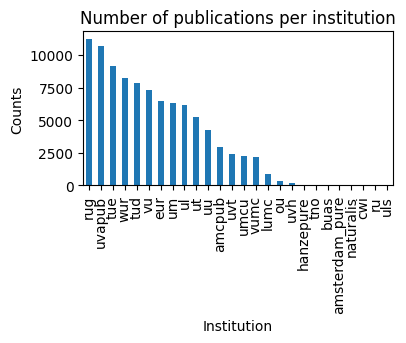

In [322]:
# descending order
sorted_counts = df_grouped_by_institution.sort_values(ascending=False)
# plot the sorted counts
sorted_counts.plot.bar(figsize=(4, 2))
plt.title('Number of publications per institution')
plt.xlabel('Institution')
plt.ylabel('Counts')
plt.show()

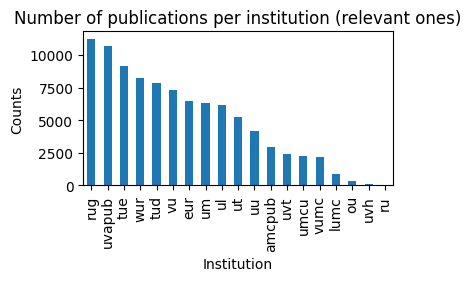

In [323]:
relevant_institutions = ['amcpub', 'eur', 'lumc', 'uvt', 'ou', 'ru', 'vu', 'rug', 'vumc', 'tud', 'tue', 'wur', 'ul', 'um', 'umcu', 'ut', 'uu', 'uvapub', 'uvh']

filtered_df = df[df['institution'].isin(relevant_institutions)]
df_grouped_by_institution = filtered_df.groupby(pd.Grouper(key='institution')).size()

# descending order
sorted_counts = df_grouped_by_institution.sort_values(ascending=False)
# plot the sorted counts for relevant institutions
sorted_counts.plot.bar(figsize=(4, 2))
plt.title('Number of publications per institution (relevant ones)')
plt.xlabel('Institution')
plt.ylabel('Counts')
plt.show()


#### Time trends 
For all institutions (for relevant change `df` to `filtered_df`)

In [324]:
# change values of "year" column to datem=time
for index, value in enumerate(df['year']):
    df.at[index, 'year'] = datetime.strptime(str(value), '%Y')
    
# df.head()

C:\Users\20211831\AppData\Local\Temp\ipykernel_28420\2929236597.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2016-01-01 00:00:00' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[index, 'year'] = datetime.strptime(str(value), '%Y')


year
1879-12-31       1
1880-12-31       0
1881-12-31       0
1882-12-31       0
1883-12-31       0
              ... 
2018-12-31    4918
2019-12-31    4958
2020-12-31    4812
2021-12-31    4993
2022-12-31    4265
Freq: A-DEC, Length: 144, dtype: int64


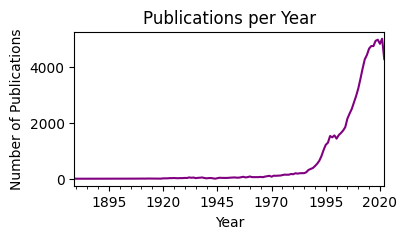

In [325]:
# grouping by year to obtain publications per year 
df_per_year = df.groupby(pd.Grouper(key='year', freq='Y')).size()
print(df_per_year)

df_per_year.plot(kind='line', figsize=(4, 2), c='purple')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.title('Publications per Year')
plt.show()

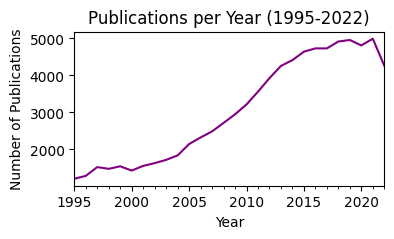

In [326]:
# investigate the increase in publications
start_date = pd.to_datetime('1995-01-01')
end_date = pd.to_datetime('2022-12-31')
filtered_df = df[(df['year'] >= start_date) & (df['year'] <= end_date)]

# grouping by year and counting the number of pubs
df_per_year = filtered_df.groupby(pd.Grouper(key='year', freq='Y')).size()

df_per_year.plot(kind='line', figsize=(4, 2), c='purple')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.title('Publications per Year (1995-2022)')
plt.show()


### Collaborators
For each publication (row) add the number of collaborators

In [327]:
def count_non_null(row):
    return row.iloc[7:17].count()

df['nr_of_contributors'] = df.apply(count_non_null, axis=1)

df.head()

,integer_id,thesis_identifier,institution,author_name,title,year,language,contributor_1,contributor_2,contributor_3,contributor_4,contributor_5,contributor_6,contributor_7,contributor_8,contributor_9,contributor_10,nr_of_contributors
0,1,https://pure.amc.nl/en/publications/structure-...,amcpub,"Azaripour, Adriano",Structure and function of the human periodonti...,2016-01-01 00:00:00,en,"van Noorden, C.J.F.","Willershausen, B.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,2,https://pure.amc.nl/en/publications/neurocogni...,amcpub,"Thissen, Andrieke J. A. M.",Neurocognitive and genetic factors in ADHD acr...,2014-01-01 00:00:00,en,"Buitelaar, J.K.","Franke, B.","Lambregts-Rommelse, N.N.J.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,3,https://pure.amc.nl/en/publications/quality-of...,amcpub,"van Huis, Maike",Quality of care and monitoring in paediatric e...,2016-01-01 00:00:00,en,"van Goudoever, H.B.","Groothoff, J.W.","van der Lee, H.H.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,4,https://pure.amc.nl/en/publications/optimizing...,amcpub,"Creemers, Huub",Optimizing quality of care for patients with A...,2016-01-01 00:00:00,en,"van den Berg, L.H.","Beelen, A.A.J.M.","Veldink, J.H.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,5,https://pure.amc.nl/en/publications/bridging-t...,amcpub,"Verlaan, Tessa",Bridging the gap between gastrointestinal endo...,2016-01-01 00:00:00,en,"Fockens, P.","Bemelman, W.A.","van Hooft, J.E.","van Berge Henegouwen, M.I.",NaN,NaN,NaN,NaN,NaN,NaN,4


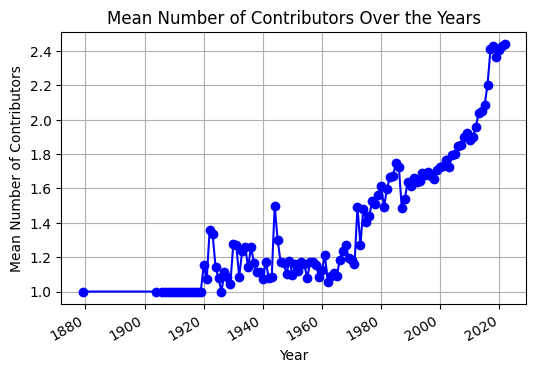

In [328]:
# plotting mean number of contributors
mean_contributors = df.groupby('year')['nr_of_contributors'].mean()

mean_contributors.plot(kind='line', marker='o', color='b', linestyle='-', figsize=(6, 4))
plt.title('Mean Number of Contributors Over the Years')
plt.xlabel('Year')
plt.ylabel('Mean Number of Contributors')
plt.grid(True)
plt.show()

### Duplicates
Are there any non-unique publication records? How are they created?

In [338]:
duplicates_in_columns = df.apply(lambda x: x.duplicated().sum())

print(duplicates_in_columns)

integer_id                0
thesis_identifier      1064
institution           94273
author_name            6402
title                  5435
year                  94180
language              94280
contributor_1         78581
contributor_2         72962
contributor_3         82575
contributor_4         89920
contributor_5         92390
contributor_6         93305
contributor_7         93880
contributor_8         94178
contributor_9         94270
contributor_10        94295
nr_of_contributors    94288
dtype: int64


For "thesis_identifier" duplicated publications appear only x2 at most - due to **publishing via 2 institutions**

In [336]:
duplicate_rows = df[df.duplicated(subset=["thesis_identifier"], keep=False)]
df_sorted = duplicate_rows.sort_values(by="thesis_identifier")
df_sorted.reset_index(drop=True, inplace=True)

df_sorted.head(2)

,integer_id,thesis_identifier,institution,author_name,title,year,language,contributor_1,contributor_2,contributor_3,contributor_4,contributor_5,contributor_6,contributor_7,contributor_8,contributor_9,contributor_10,nr_of_contributors
0,64145,http://hdl.handle.net/1887/11006,ul,"Campen, M. van",Gans Israël : Voetiaanse en Coccejaanse visies...,2006-01-01 00:00:00,nl,"Wall, E.v.d.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,64086,http://hdl.handle.net/1887/11006,ul,"Campen, M. van",Gans Israël : Voetiaanse en Coccejaanse visies...,2006-01-01 00:00:00,nl,"Wall, E.v.d.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [331]:
len(duplicate_rows)

2128

Similar with "title", however there are at most 4 duplicates, with indicates **publishing under 2+ institutions**. Also shows how "author_name" is not standardized.
A unique record may be extracted by grouping on these columns.

In [340]:
duplicate_rows = df[df.duplicated(subset=["title"], keep=False)]
df_sorted = duplicate_rows.sort_values(by="title")
df_sorted.reset_index(drop=True, inplace=True)

df_sorted.head(4)

,integer_id,thesis_identifier,institution,author_name,title,year,language,contributor_1,contributor_2,contributor_3,contributor_4,contributor_5,contributor_6,contributor_7,contributor_8,contributor_9,contributor_10,nr_of_contributors
0,114829,https://research.vu.nl/en/publications/f91709b...,vu,"Groot, R.","""Diffuse sclerosing osteomyelitis of mandible:...",1995-01-01 00:00:00,und,"Kusen, G.","van Merkesteyn, J.","Bras, J.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,92109,https://dare.uva.nl/personal/pure/en/publicati...,uvapub,"Groot, R.","""Diffuse sclerosing osteomyelitis of mandible:...",1995-01-01 00:00:00,und,"Kusen, G.","van Merkesteyn, J.","Bras, J.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,67870,http://hdl.handle.net/1887/3479752,ul,"Duijster, J.W.","""Driver or passenger"" : an integrated epidemio...",2022-01-01 00:00:00,en,"Neefjes, J.","Mughini-Gras, L.","Franz, E.","Baarle, D.v.",NaN,NaN,NaN,NaN,NaN,NaN,4
3,12248,http://hdl.handle.net/1887/3479752,lumc,"Duijster, J.W.","""Driver or passenger"" : an integrated epidemio...",2022-01-01 00:00:00,en,"Neefjes, J.","Mughini-Gras, L.","Franz, E.","Baarle, D.v.",NaN,NaN,NaN,NaN,NaN,NaN,4


In [332]:
len(duplicate_rows)

2128

In [341]:
more_than_2_dup = df_sorted.groupby('title').filter(lambda x: len(x) > 2)
more_than_2_dup.head(6)

,integer_id,thesis_identifier,institution,author_name,title,year,language,contributor_1,contributor_2,contributor_3,contributor_4,contributor_5,contributor_6,contributor_7,contributor_8,contributor_9,contributor_10,nr_of_contributors
66,66729,http://hdl.handle.net/1887/72513,ul,"Geerse, D.J.",A comprehensive approach to assess walking abi...,2019-01-01 00:00:00,en,"Hilten, J.v.","Marinus, J.","Roerdink, M.","Bloem, B.","Pijnappels, M.",NaN,NaN,NaN,NaN,NaN,5
67,107534,https://research.vu.nl/en/publications/24d3e1b...,vu,"Geerse, Daphne",A comprehensive approach to assess walking abi...,2019-01-01 00:00:00,en,"Roerdink, M.","Marinus, J.","van Hilten, J.J.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
68,11887,http://hdl.handle.net/1887/72513,lumc,"Geerse, D.J.",A comprehensive approach to assess walking abi...,2019-01-01 00:00:00,en,"Hilten, J.v.","Marinus, J.","Roerdink, M.","Bloem, B.","Pijnappels, M.",NaN,NaN,NaN,NaN,NaN,5
275,1188,https://pure.amc.nl/en/publications/adipose-st...,amcpub,"Kroeze, Robert J.",Adipose stem cells on a biodegradable polymer ...,2014-01-01 00:00:00,en,"van Royen, B.J.","Smit, T.H.","Helder, M.N.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
276,115129,https://research.vumc.nl/en/publications/07ad8...,vumc,"Kroeze, R.J.",Adipose stem cells on a biodegradable polymer ...,2014-01-01 00:00:00,und,"van Royen, B.","Smit, T.","Helder, M.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
277,106825,https://research.vu.nl/en/publications/0ed9ec1...,vu,"Kroeze, R.J.",Adipose stem cells on a biodegradable polymer ...,2014-01-01 00:00:00,en,"van Royen, B.","Smit, T.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [342]:
len(more_than_2_dup)

390

#### Check if there are authors who are also contributors

In [10]:
both = []
unique_authors = set(df['author_name'])
for column in df.columns[7:17]:
    unique_names = set(df[column])
    common_names = unique_authors.intersection(unique_names)
    both.append(common_names)

merged_list = []
for s in both:
    merged_list.extend(s)

unique_list = list(set(merged_list))
unique_list

['Haesaert, S.',
 'van de Plassche, R.J.',
 'De Ridder, D.',
 'Goossens, P.',
 'Bada, G.',
 'Dijkman, B.',
 'Gaikhorst, L.',
 'Verhoeven, J.',
 'Wanders, N.',
 'Schaap, F.G.',
 'Scholtes, V.A.B.',
 'Hermans, M.',
 'de Man, J.',
 'Wang, X.',
 'Yang, S.',
 'de Kok, A.',
 'Tal, Y.',
 'Hegyi, A.',
 'ten Kortenaar, M.V.',
 'Albers, P.',
 'Renema, J.J.',
 'Tong, D.H.',
 'Postma, E.',
 'De Vries, M.',
 'Dietz, V.',
 'Schmitz, J.',
 'Veerman, C.',
 'Vogel, W.',
 'Phoa, S.S.K.S.',
 'Bossen, D.',
 'Zhang, M.',
 'Han, W.',
 'Guo, Y.',
 'Trieling, R.R.',
 'Sebastiano, F.',
 'van Veen, M.G.',
 'Winkens, I.',
 'Jellema, P.',
 'Kox, L.S.',
 'Brouwer, M.',
 'de Groot, C.',
 'Merkus, D.',
 'Kuipers, L.',
 'Dirven, L.',
 'Kloeze, E.',
 'van Vliet, L.J.',
 'Voulgaris, S.',
 'van der Veen, M.',
 'de Haas, W.',
 'Maas, M.',
 'Klomp, D.',
 'Meijer, A.B.',
 'Grassiani, E.',
 'van Geenen, R.C.I.',
 'Priemus, H.',
 'Gerdes, V.E.A.',
 'de Graaf, W.',
 'van Wijk, J.J.',
 'Hoffland, E.',
 'Snelder, M.',
 'van Tol

In [12]:
print('{} are also contributors'.format(len(unique_list)))

4440

In [16]:
# investivate these rows
result = df[df.isin(unique_list).any(axis=1)]
result

,integer_id,thesis_identifier,institution,author_name,title,year,language,contributor_1,contributor_2,contributor_3,contributor_4,contributor_5,contributor_6,contributor_7,contributor_8,contributor_9,contributor_10
1,2,https://pure.amc.nl/en/publications/neurocogni...,amcpub,"Thissen, Andrieke J. A. M.",Neurocognitive and genetic factors in ADHD acr...,2014,en,"Buitelaar, J.K.","Franke, B.","Lambregts-Rommelse, N.N.J.",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,https://pure.amc.nl/en/publications/quality-of...,amcpub,"van Huis, Maike",Quality of care and monitoring in paediatric e...,2016,en,"van Goudoever, H.B.","Groothoff, J.W.","van der Lee, H.H.",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,https://pure.amc.nl/en/publications/bridging-t...,amcpub,"Verlaan, Tessa",Bridging the gap between gastrointestinal endo...,2016,en,"Fockens, P.","Bemelman, W.A.","van Hooft, J.E.","van Berge Henegouwen, M.I.",NaN,NaN,NaN,NaN,NaN,NaN
5,6,https://pure.amc.nl/en/publications/epidemiolo...,amcpub,"Hoffmans, Ruth",Epidemiology and management of rhinosinusitis,2018,en,"Fokkens, W.J.","Reitsma, S.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,https://pure.amc.nl/en/publications/under-pres...,amcpub,"van Riel, Annelieke C. M. J.",Under pressure: Pulmonary arterial hypertensio...,2018,en,"Mulder, B.J.M.","Bouma, B.J.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94289,125836,https://research.wur.nl/en/publications/toxici...,wur,"Koster, I.W.",Toxicity in anaerobic digestion : with emphasi...,1989,en,"Lettinga, G.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94292,125839,https://research.wur.nl/en/publications/heat-a...,wur,"ten Berge, H.F.M.",Heat and water transfer at the bare soil surfa...,1986,en,"Wageningen, L.","Bolt, G.","Wartena, L.","Stroosnijder, L.",NaN,NaN,NaN,NaN,NaN,NaN
94295,125842,https://research.wur.nl/en/publications/advent...,wur,"Custers, J.B.M.",Adventitious shoot formation on leaf cuttings ...,1986,en,"Wageningen, L.","Doorenbos, J.","Pierik, R.",NaN,NaN,NaN,NaN,NaN,NaN,NaN
94297,125844,https://research.wur.nl/en/publications/variab...,wur,"van den Berg, J.A.",Variability of parameters for modelling soil m...,1989,en,"van der Molen, W.","Terwindt, J.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### "Contributor" NER
Trying Stanford NER

In [12]:
# dictionary with counts - how many times each supervisor appears
supervisors = {}
for column in df.columns[7:17]:
    for value in df[column]:
        if value not in supervisors:
            supervisors[value] = 1
        else:
            supervisors[value] += 1
supervisors

{'van Noorden, C.J.F.': 24,
 'Buitelaar, J.K.': 10,
 'van Goudoever, H.B.': 18,
 'van den Berg, L.H.': 3,
 'Fockens, P.': 87,
 'Fokkens, W.J.': 13,
 'Mulder, B.J.M.': 26,
 'Kager, P.A.': 7,
 'Hasman, A.': 65,
 'Rinke de Wit, T.F.': 15,
 'Beijnen, J.H.': 1,
 'Stam, J.': 9,
 'Bos, J.D.': 20,
 'Benninga, M.A.': 34,
 'Dreschler, W.A.': 10,
 'Vandertop, P.P.': 16,
 'de Vries, J.H.': 13,
 'Pals, S.T.': 9,
 'Kroon, B.B.R.': 2,
 'van Laarhoven, H.W.M.': 17,
 'Linszen, D.H.': 12,
 'van de Beek, D.': 21,
 'Delarosette, J.J.M.C.H.': 16,
 'Christoffels, V.M.': 20,
 'Heineman, M.J.': 8,
 'Wilde, A.': 43,
 'de Jong, M.D.': 45,
 'van der Post, J.A.M.': 21,
 'Balm, A.J.M.': 8,
 'Kerkhoffs, G.M.M.J.': 29,
 'van Dijk, C.N.': 46,
 'Kenter, G.G.': 6,
 'Levy, B.': 2,
 'Seidell, J.C.': 3,
 'Zuurbier, C.J.': 8,
 'Zaaijer, H.L.': 5,
 'Berkhout, B.': 29,
 'van der Schoot, C.E.': 26,
 'Punt, C.J.A.': 6,
 'de Haan, L.': 60,
 'van der Horst, C.M.A.M.': 30,
 'Stronks, K.': 89,
 'Geijtenbeek, T.B.H.': 20,
 'van Goo

In [36]:
# loading the model
st = StanfordNERTagger('stanford-ner/classifiers/english.all.3class.distsim.crf.ser.gz', 'stanford-ner/stanford-ner.jar')
os.environ['STANFORD_MODELS'] = '/absolute/path/to/stanford-ner/'

In [77]:
# taking a subset of the supervisors dict to test Stanford NER
subset = dict(itertools.islice(supervisors.items(), 1000))

In [95]:
humans = []
not_humans = []
for supervisor in supervisors:
    for sent in nltk.sent_tokenize(supervisor):

        tokens = nltk.tokenize.word_tokenize(sent)
        i = 0
        tags = st.tag(tokens)
        for tag in tags:
            if tag[1]=='PERSON':
                i = 1
        if i == 1:
            humans.append(tokens) # if recognized as a person add to humans
        else:
            not_humans.append(tokens)

['van', 'Noorden', ',', 'C.J.F', '.']
['Buitelaar', ',', 'J.K', '.']
['van', 'Goudoever', ',', 'H.B', '.']
['van', 'den', 'Berg', ',', 'L.H', '.']
['Fockens', ',', 'P', '.']
['Fokkens', ',', 'W.J', '.']
['Mulder', ',', 'B.J.M', '.']
['Kager', ',', 'P.A', '.']
['Hasman', ',', 'A', '.']
['Rinke', 'de', 'Wit', ',', 'T.F', '.']
['Beijnen', ',', 'J.H', '.']
['Stam', ',', 'J', '.']
['Bos', ',', 'J.D', '.']
['Benninga', ',', 'M.A', '.']
['Dreschler', ',', 'W.A', '.']
['Vandertop', ',', 'P.P', '.']
['de', 'Vries', ',', 'J.H', '.']
['Pals', ',', 'S.T', '.']
['Kroon', ',', 'B.B.R', '.']
['van', 'Laarhoven', ',', 'H.W.M', '.']
['Linszen', ',', 'D.H', '.']
['van', 'de', 'Beek', ',', 'D', '.']
['Delarosette', ',', 'J.J.M.C.H', '.']
['Christoffels', ',', 'V.M', '.']
['Heineman', ',', 'M.J', '.']
['Wilde', ',', 'A', '.']
['de', 'Jong', ',', 'M.D', '.']
['van', 'der', 'Post', ',', 'J.A.M', '.']
['Balm', ',', 'A.J.M', '.']
['Kerkhoffs', ',', 'G.M.M.J', '.']
['van', 'Dijk', ',', 'C.N', '.']
['Kenter', '

KeyboardInterrupt: 

In [256]:
x = len(humans)/(len(humans)+len(not_humans))
print("{}% tagged as real surnames".format(x.__round__(3)*100))

70.3% tagged as real surnames


In [13]:
filtered_subs = {k: v for k, v in supervisors.items() if not (isinstance(k, float) and math.isnan(k))} # removed NaN keys from dict


In [16]:
total_count = sum(value for value in filtered_subs.values())
print("Total count:", total_count)

Total count: 190716


In [27]:
# impostor keys 
search_words = ['School', 'Sciences', 'Surgery']
# filtering keys to check if impostor key actually occur
filtered_keys = {k: v for k, v in filtered_subs.items() if any(word in k for word in search_words)}

print(filtered_keys)

{'Surgery, P.': 88, 'School of Law, E.': 189, 'School of Philosophy, E.': 62, 'Surgery, C.': 66, 'Sciences, S.': 7}


In [23]:
# checking records with no surname 
filtered_items = {k: v for k, v in filtered_subs.items() if k.startswith(',')}

print(filtered_items)

{', N.': 116, ', S.': 552, ', v.d.V.': 33, ', C.': 118, ', H.': 254, ', O.': 108, ', P.': 641, ', v.d.M.': 26, ', v.d.G.': 1, ', v.d.K.': 4, ', W.': 2, ', E.T.': 1, ', v.d.H.': 23, ', v.d.B.': 7, ', d.v.L.': 1, ', B.': 74, ', V.d.B.': 20, ', V.d.M.': 4, ', V.d.H.': 2, ', V.d.V.': 1, ', F.a.F.': 95, ', v.d.S.': 84, ', M.': 7, ', F.a.m.o.L.': 35, ', v.d.L.': 4, ', d.W.H.': 1, ', L.': 44, ', v.d.F.': 9, ', A.': 73, ', G.': 37, ', S.U.': 1, ', K.': 169, ', v.d.P.': 1, ', R.': 61, ', J.': 2, ', V.d.Z.l.': 13, ', V.D.l.': 6, ', D.B.l.': 2, ', V.d.S.': 1, ', E.': 14, ', v.E.G.': 2, ', M.v.d.M.': 4, ', v.d.W.': 2, ', v.E.T.K.': 1, ', V.': 4, ', D.K.l.': 3, ', v.H.-.B.': 1, ', U.': 1, ', V.d.H.g.': 2, ', V.d.E.': 1}


In [115]:
len(filtered_items)

50

In [19]:
# focusing on the highest counts (more important)
sorted_subs = dict(sorted(filtered_subs.items(), key=lambda item: item[1], reverse=True))

In [212]:
# taking a subset of most popular supervisors
subs_list = list(sorted_subs.keys())
subs_list = subs_list[:40]

In [260]:
# extracting only surnames
def extract_text_until_first_comma(text):
    parts = text.split(',', 1)
    return parts[0]

##### Using different models for spaCy on surnames only - Dutch and English, comparing the results
Discarding records without surnames

In [216]:
to_check = []
not_surnames = []
for text in subs_list:
    surname = extract_text_until_first_comma(text)
    if surname == '':
        not_surnames.append(text)
    else:
        to_check.append(text)
check = []
for text in to_check:
    surname = extract_text_until_first_comma(text)
    check.append(surname)

In [235]:
# spaCy's pre-trained Dutch NER model
nlp = spacy.load("nl_core_news_sm")

output_nl = []
label_nl = []

# NER tagging on surnames
for text in check:
    i = 0 
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            if i == 1:
                break
            # print(f"Surname of a person: {text}")
            output_nl.append(f"Surname of a person: {text}")
            label_nl.append(1)
            i = 1
        elif ent.label_ != "PERSON":
            # print(f"Not recognized: {text}")
            output_nl.append(f"Not recognized: {text}")
            label_nl.append(0)
            i = 1
    if doc.ents == ():
        if i == 1:
            break
        # print(f"Not recognized: {text}")
        output_nl.append(f"Not recognized: {text}")
        label_nl.append(0)

Not recognized: Wetenschappen/UMCG
Surname of a person: Stan Ackermans Instituut
Surname of a person: Wageningen
Surname of a person: Students
Not recognized: Engineering
Not recognized: Rechtsgeleerdheid
Not recognized: Dekker
Not recognized: Bedrijfskunde
Not recognized: School of Law
Not recognized: Eliel
Not recognized: Huizinga
Not recognized: Biologie
Not recognized: MHN
Not recognized: Visser
Not recognized: Feringa
Surname of a person: Scheltens
Not recognized: van Eijndhoven
Not recognized: Office
Surname of a person: Kok
Not recognized: Rijsman
Not recognized: Bertrand
Not recognized: Röttgering
Not recognized: van der Poll
Not recognized: de Vries
Not recognized: Meijer
Not recognized: de Vries
Not recognized: de Kok
Surname of a person: Jansen
Not recognized: van der Veen
Surname of a person: Beekman
Not recognized: Spaink
Surname of a person: Bouwstra
Not recognized: van Mechelen
Not recognized: Tibboel


In [247]:
# spaCy's pre-trained English NER model
nlp = spacy.load("en_core_web_sm")

output_en = []
label_en = []

# NER tagging on surnames
for text in check:
    i = 0
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            if i == 1:
                break
            # print(f"Surname of a person: {text}")
            output_en.append(f"Surname of a person: {text}")
            label_en.append(1)
            i = 1
        elif ent.label_ != "PERSON":
            # print(f"Not recognized: {text}")
            output_en.append(f"Not recognized: {text}")
            i = 1
            label_en.append(0)
    if doc.ents == ():
        # print(f"Not recognized: {text}")
        if i == 1:
            break
        output_en.append(f"Not recognized: {text}")
        label_en.append(0)

Not recognized: Wetenschappen/UMCG
Surname of a person: Stan Ackermans Instituut
Not recognized: Wageningen
Not recognized: Students
Not recognized: Engineering
Surname of a person: Rechtsgeleerdheid
Not recognized: Dekker
Not recognized: Bedrijfskunde
Not recognized: School of Law
Not recognized: Eliel
Not recognized: Huizinga
Not recognized: Biologie
Not recognized: MHN
Surname of a person: Visser
Not recognized: Feringa
Not recognized: Scheltens
Surname of a person: van Eijndhoven
Not recognized: Office
Not recognized: Kok
Surname of a person: Rijsman
Not recognized: Bertrand
Not recognized: Röttgering
Surname of a person: van der Poll
Not recognized: de Vries
Not recognized: Meijer
Not recognized: de Vries
Not recognized: de Kok
Surname of a person: Jansen
Surname of a person: van der Veen
Not recognized: Beekman
Not recognized: Spaink
Not recognized: Bouwstra
Surname of a person: van Mechelen
Not recognized: Tibboel


In [227]:
# check which tags were different
differ_indices = []

for i in range(min(len(output_nl), len(output_en))):
    if output_en[i] != output_nl[i]:
        differ_indices.append(i)

differ_elements_nl = [output_nl[i] for i in differ_indices]
differ_elements_en = [output_en[i] for i in differ_indices]

print("Differing elements from check with NL NER model:", differ_elements_nl)
print("Differing elements from check with EN NER model:", differ_elements_en)

Indices where the lists differ: [2, 3, 5, 13, 15, 16, 18, 19, 22, 28, 29, 30, 31, 32, 33]
Differing elements from check with NL NER model: ['Surname of a person: Wageningen', 'Surname of a person: Students', 'Not recognized: Rechtsgeleerdheid', 'Not recognized: Visser', 'Surname of a person: Scheltens', 'Not recognized: van Eijndhoven', 'Surname of a person: Kok', 'Not recognized: Rijsman', 'Not recognized: van der Poll', 'Not recognized: van der Veen', 'Surname of a person: Beekman', 'Not recognized: Spaink', 'Surname of a person: Bouwstra', 'Not recognized: van Mechelen', 'Not recognized: Tibboel']
Differing elements from check with EN NER model: ['Not recognized: Wageningen', 'Not recognized: Students', 'Surname of a person: Rechtsgeleerdheid', 'Surname of a person: Visser', 'Not recognized: Scheltens', 'Surname of a person: van Eijndhoven', 'Not recognized: Kok', 'Surname of a person: Rijsman', 'Surname of a person: van der Poll', 'Surname of a person: van der Veen', 'Surname of a 

In [228]:
# check which tags were the same
same_elements = []

for i in range(min(len(output_nl), len(output_en))):
    if output_nl[i] == output_en[i]:
        same_elements.append(output_nl[i])

print("Elements that are the same:", same_elements)

Elements that are the same: ['Not recognized: Wetenschappen/UMCG', 'Surname of a person: Stan Ackermans Instituut', 'Not recognized: Engineering', 'Not recognized: Dekker', 'Not recognized: Bedrijfskunde', 'Not recognized: School of Law', 'Not recognized: Eliel', 'Not recognized: Huizinga', 'Not recognized: Biologie', 'Not recognized: MHN', 'Not recognized: Feringa', 'Not recognized: Office', 'Not recognized: Bertrand', 'Not recognized: Röttgering', 'Not recognized: de Vries', 'Not recognized: Meijer', 'Not recognized: de Vries', 'Not recognized: de Kok', 'Surname of a person: Jansen']


In [233]:
# manually assigned labels
truth = [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [250]:
# accuracy for both models
accuracy_model1 = accuracy_score(truth, label_nl)
accuracy_model2 = accuracy_score(truth, label_en)

print("Accuracy for Model 1:", accuracy_model1)
print("Accuracy for Model 2:", accuracy_model2)

Accuracy for Model 1: 0.4117647058823529
Accuracy for Model 2: 0.4411764705882353


In [261]:
# using the initial model again
nlp = spacy.load("xx_ent_wiki_sm")

output = []
label = []

# NER tagging on surnames
for text in check:
    i = 0
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            if i == 1:
                break
            # print(f"Surname of a person: {text}")
            output.append(f"Surname of a person: {text}")
            label.append(1)
            i = 1
        elif ent.label_ != "PERSON":
            # print(f"Not recognized: {text}")
            output.append(f"Not recognized: {text}")
            i = 1
            label.append(0)
    if doc.ents == ():
        # print(f"Not recognized: {text}")
        if i == 1:
            break
        output.append(f"Not recognized: {text}")
        label.append(0)

In [262]:
accuracy_model3 = accuracy_score(truth, label)

print("Accuracy for the inital model:", accuracy_model3)

Accuracy for Model 1: 0.35294117647058826


### Plots for contributors

In [17]:
# deleting empty surnames keys 
def delete_from_dict_by_keys(main_dict, keys_to_delete):
    for key in keys_to_delete:
        if key in main_dict:
            del main_dict[key]

# deleting manually identified not surname keys 
def discard_values_by_indices(dictionary, indices_to_discard):
    filtered_dictionary = {}
    for i, (key, value) in enumerate(dictionary.items()):
        if i not in indices_to_discard:
            filtered_dictionary[key] = value
    return filtered_dictionary

In [24]:
delete_from_dict_by_keys(sorted_subs, filtered_items.keys())
indices_to_discard = [0, 1, 2, 3, 4, 5, 7, 8, 11, 12, 16, 17]
filtered_dict = discard_values_by_indices(sorted_subs, indices_to_discard) # using filtered_dict rn

In [25]:
filtered_dict

{'Dekker, J.': 211,
 'Eliel, E.': 179,
 'Huizinga, T.': 178,
 'Visser, R.': 161,
 'Feringa, B.L.': 154,
 'Scheltens, P.': 154,
 'Kok, J.': 139,
 'Rijsman, J.': 137,
 'Bertrand, J.': 136,
 'Röttgering, H.': 135,
 'van der Poll, T.': 134,
 'de Vries, L.': 132,
 'Meijer, E.': 130,
 'de Vries, H.': 127,
 'de Kok, A.': 123,
 'Jansen, J.': 122,
 'van der Veen, F.': 120,
 'Beekman, A.': 118,
 'Spaink, H.': 117,
 'Bouwstra, J.': 117,
 'van Mechelen, W.': 116,
 'Tibboel, D.': 115,
 'Brouwer, J.': 114,
 'de Vos, W.': 112,
 'Barkhof, F.': 112,
 'Phys, E.A.&.A.': 110,
 'Prins, M.': 107,
 'Aerts, J.': 107,
 'Instituut, H.': 107,
 'Lemstra, P.': 107,
 'Wezel, G.v.': 105,
 'Irth, H.': 105,
 'Grosveld, F.': 104,
 'Lohse, D.': 104,
 'Verstegen, M.': 104,
 'de Vries, J.': 103,
 'Mulder, M.': 100,
 'Schalij, M.': 99,
 'Smit, J.': 99,
 'Steinbuch, M.': 99,
 'Kok, G.': 98,
 'de Jong, P.': 98,
 'Busscher, H.': 98,
 'Dekker, R.': 97,
 'de Haan, J.': 97,
 'Prins, H.': 97,
 'Faure, M.': 96,
 'Pieters, R.': 95,

In [28]:
delete_from_dict_by_keys(filtered_dict, filtered_keys.keys()) # deleting keys based on other keywords

In [29]:
total_count = sum(value for value in filtered_dict.values())
print("Total count:", total_count)

Total count: 181854


In [30]:
filtered_dict

{'Dekker, J.': 211,
 'Eliel, E.': 179,
 'Huizinga, T.': 178,
 'Visser, R.': 161,
 'Feringa, B.L.': 154,
 'Scheltens, P.': 154,
 'Kok, J.': 139,
 'Rijsman, J.': 137,
 'Bertrand, J.': 136,
 'Röttgering, H.': 135,
 'van der Poll, T.': 134,
 'de Vries, L.': 132,
 'Meijer, E.': 130,
 'de Vries, H.': 127,
 'de Kok, A.': 123,
 'Jansen, J.': 122,
 'van der Veen, F.': 120,
 'Beekman, A.': 118,
 'Spaink, H.': 117,
 'Bouwstra, J.': 117,
 'van Mechelen, W.': 116,
 'Tibboel, D.': 115,
 'Brouwer, J.': 114,
 'de Vos, W.': 112,
 'Barkhof, F.': 112,
 'Phys, E.A.&.A.': 110,
 'Prins, M.': 107,
 'Aerts, J.': 107,
 'Instituut, H.': 107,
 'Lemstra, P.': 107,
 'Wezel, G.v.': 105,
 'Irth, H.': 105,
 'Grosveld, F.': 104,
 'Lohse, D.': 104,
 'Verstegen, M.': 104,
 'de Vries, J.': 103,
 'Mulder, M.': 100,
 'Schalij, M.': 99,
 'Smit, J.': 99,
 'Steinbuch, M.': 99,
 'Kok, G.': 98,
 'de Jong, P.': 98,
 'Busscher, H.': 98,
 'Dekker, R.': 97,
 'de Haan, J.': 97,
 'Prins, H.': 97,
 'Faure, M.': 96,
 'Pieters, R.': 95,

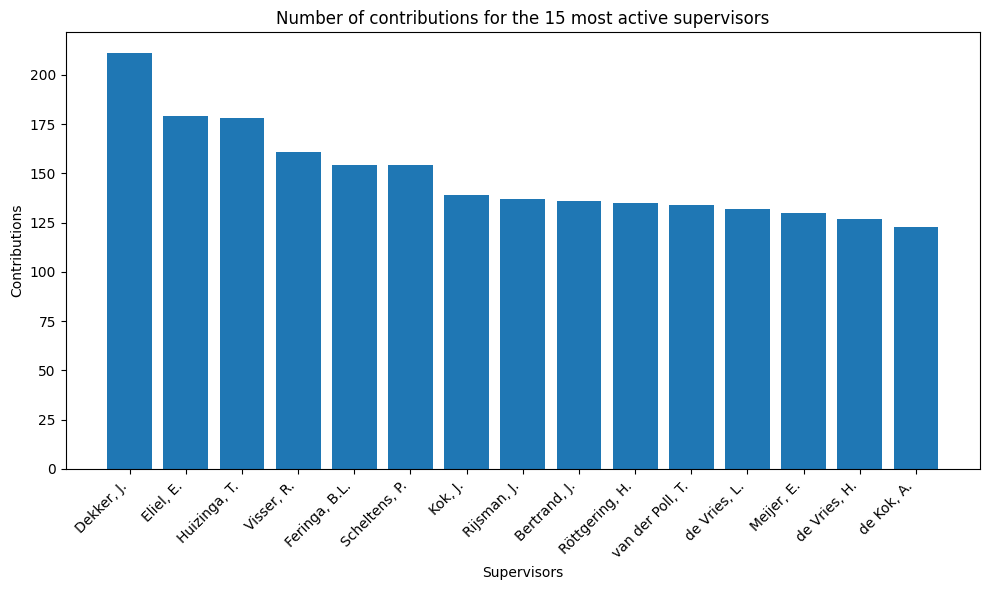

In [286]:
def plot_dictionary_counts(dictionary):
    keys = list(dictionary.keys())[:15]
    counts = [dictionary[key] for key in keys]

    plt.figure(figsize=(10, 6))
    plt.bar(keys, counts)
    plt.xlabel('Supervisors')
    plt.ylabel('Contributions')
    plt.title('Number of contributions for the 15 most active supervisors')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_dictionary_counts(filtered_dict)

Can also be done per topic

In [297]:
# correcting the dataframe
allowed_values = filtered_dict.keys()
for column in df.columns[7:17]:
    df.loc[~df[column].isin(allowed_values), column] = np.nan

#### Contributors pairs/trios/fours

Can be investigated more as a network
Duplicates should be considered

In [310]:
# for pairs
df_combs = df.copy()

columns_to_consider = df.columns[7:17]

def get_person_combinations(row):
    persons = [person for person in row[columns_to_consider] if pd.notna(person)]
    return list(combinations(persons, 2))

df_combs['combinations'] = df_combs.apply(get_person_combinations, axis=1)
df_exploded = df_combs.explode('combinations')
combination_counts = df_exploded['combinations'].value_counts()

print(combination_counts)


combinations
(Irth, H., Bouwstra, J.)              67
(Busscher, H., van der Mei, H.)       66
(Scheltens, P., van der Flier, W.)    46
(van der Klis, M., Phys, E.A.&.A.)    39
(Wijers, R., Phys, E.A.&.A.)          36
                                      ..
(Saarloos, W.v., Lelyveld, I.v.)       1
(Saarloos, W.v., Stanley, H.)          1
(Eliel, E., Meijer, J.)                1
(Eliel, E., Lelyveld, I.v.)            1
(van der Molen, W., Koopmans, R.)      1
Name: count, Length: 97318, dtype: int64


In [311]:
# for trios
df_combs = df.copy()

columns_to_consider = df.columns[7:17]

def get_person_combinations(row):
    persons = [person for person in row[columns_to_consider] if pd.notna(person)]
    return list(combinations(persons, 3))

df_combs['combinations'] = df_combs.apply(get_person_combinations, axis=1)
df_exploded = df_combs.explode('combinations')
combination_counts = df_exploded['combinations'].value_counts()

print(combination_counts)

combinations
(Bax, J., Delgado, V., Ajmone Marsan, N.)          20
(Bax, J., Ajmone Marsan, N., Bootsma, M.)          16
(Delgado, V., Ajmone Marsan, N., Bootsma, M.)      14
(Bax, J., Delgado, V., Bootsma, M.)                14
(Scheltens, P., Barkhof, F., van der Flier, W.)    13
                                                   ..
(Impett, J., Lewis, G., Peters, G.)                 1
(Impett, J., Meelberg, V., Peters, G.)              1
(Ingold, T., Lewis, G., Meelberg, V.)               1
(Ingold, T., Lewis, G., Peters, G.)                 1
(Bolt, G., Wartena, L., Stroosnijder, L.)           1
Name: count, Length: 70184, dtype: int64


In [312]:
# for fours 
df_combs = df.copy()

columns_to_consider = df.columns[7:17]

def get_person_combinations(row):
    persons = [person for person in row[columns_to_consider] if pd.notna(person)]
    return list(combinations(persons, 4))

df_combs['combinations'] = df_combs.apply(get_person_combinations, axis=1)
df_exploded = df_combs.explode('combinations')
combination_counts = df_exploded['combinations'].value_counts()

print(combination_counts)

combinations
(Bax, J., Delgado, V., Ajmone Marsan, N., Bootsma, M.)         12
(Silva, P., Brunner, J., Kay, C., Valdivia Rivera, S.)          5
(Silva, P., Brunner, J., Amann, E., Kay, C.)                    5
(Snoo, G.d., Iongh, H.d., Tukker, A., Bodegom, P.v.)            5
(Silva, P., Amann, E., Kay, C., Valdivia Rivera, S.)            5
                                                               ..
(Parnachev, A., Starinets, A., Vandoren, S., Achucarro, A.)     1
(Parnachev, A., Starinets, A., Vandoren, S., Boyarsky, A.)      1
(Parnachev, A., Starinets, A., Vandoren, S., Eliel, E.)         1
(Parnachev, A., Starinets, A., Achucarro, A., Boyarsky, A.)     1
(Verstegen, M., Huisman, E., Verreth, J., Schrama, J.)          1
Name: count, Length: 41760, dtype: int64


In [313]:
df_combs = df.copy()

columns_to_consider = df.columns[7:17]

def get_person_combinations(row):
    persons = [person for person in row[columns_to_consider] if pd.notna(person)]
    return list(combinations(persons, 5))

df_combs['combinations'] = df_combs.apply(get_person_combinations, axis=1)
df_exploded = df_combs.explode('combinations')
combination_counts = df_exploded['combinations'].value_counts()

print(combination_counts)

combinations
(Silva, P., Brunner, J., Amann, E., Kay, C., Valdivia Rivera, S.)            4
(Bax, J., Ajmone Marsan, N., Schalij, M., Zamorano, J., Bootsma, M.)         4
(Silva, P., Brunner, J., Amann, E., Cox, C., Valdivia Rivera, S.)            3
(Nout, R., Creutzberg, C., Beets, G., Berbée, M., Kerkhof, E.)               2
(Putter, H., Braat, A., Baranski, A., Pirenne, J., Boer, M.d.)               2
                                                                            ..
(Greef, J.v.d., Wijk, E.v., Wang, M., Schaardenburg, D.v., Haenen, G.)       1
(Greef, J.v.d., Wijk, E.v., Wang, M., Schaardenburg, D.v., Verpoorte, R.)    1
(Greef, J.v.d., Wijk, E.v., Wang, M., Musumeci, F., Meulman, J.)             1
(Greef, J.v.d., Wijk, E.v., Wang, M., Musumeci, F., Haenen, G.)              1
(Mol, A., Salet, W., Janssen-Jansen, L., Tan, W.G.Z., Wiekens, C.)           1
Name: count, Length: 21619, dtype: int64
